In [1]:
pip install ucimlrepo

Note: you may need to restart the kernel to use updated packages.


In [2]:
from ucimlrepo import fetch_ucirepo
import numpy as np
import matplotlib.pyplot as plt 
from sklearn.datasets import fetch_openml            # common data set access
from sklearn.preprocessing import StandardScaler     # scaling transform
from sklearn.model_selection import train_test_split # validation tools
from sklearn.metrics import accuracy_score, zero_one_loss
import pandas as pd

from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier
seed = 1234
np.random.seed(seed)
import warnings
warnings.filterwarnings('ignore')
# fetch dataset 
DB = fetch_ucirepo(id=296) 
  
# data (as pandas dataframes) 
X = DB.data.features 
y = DB.data.targets 






In [3]:
from sklearn.preprocessing import LabelEncoder

X.fillna('Unknown', inplace=True)

label_encoder = LabelEncoder()

for column in X.columns:
    if X[column].dtype == 'object':
        X[column] = label_encoder.fit_transform(X[column])
        print(X[column], ": ", list(label_encoder.classes_)) 

print(X.info())


0         2
1         2
2         0
3         2
4         2
         ..
101761    0
101762    0
101763    2
101764    2
101765    2
Name: race, Length: 101766, dtype: int64 :  ['AfricanAmerican', 'Asian', 'Caucasian', 'Hispanic', 'Other', 'Unknown']
0         0
1         0
2         0
3         1
4         1
         ..
101761    1
101762    0
101763    1
101764    0
101765    1
Name: gender, Length: 101766, dtype: int64 :  ['Female', 'Male', 'Unknown/Invalid']
0         0
1         1
2         2
3         3
4         4
         ..
101761    7
101762    8
101763    7
101764    8
101765    7
Name: age, Length: 101766, dtype: int64 :  ['[0-10)', '[10-20)', '[20-30)', '[30-40)', '[40-50)', '[50-60)', '[60-70)', '[70-80)', '[80-90)', '[90-100)']
0         1
1         1
2         1
3         1
4         1
         ..
101761    1
101762    1
101763    1
101764    1
101765    1
Name: weight, Length: 101766, dtype: int64 :  ['>200', 'Unknown', '[0-25)', '[100-125)', '[125-150)', '[150-175)', '

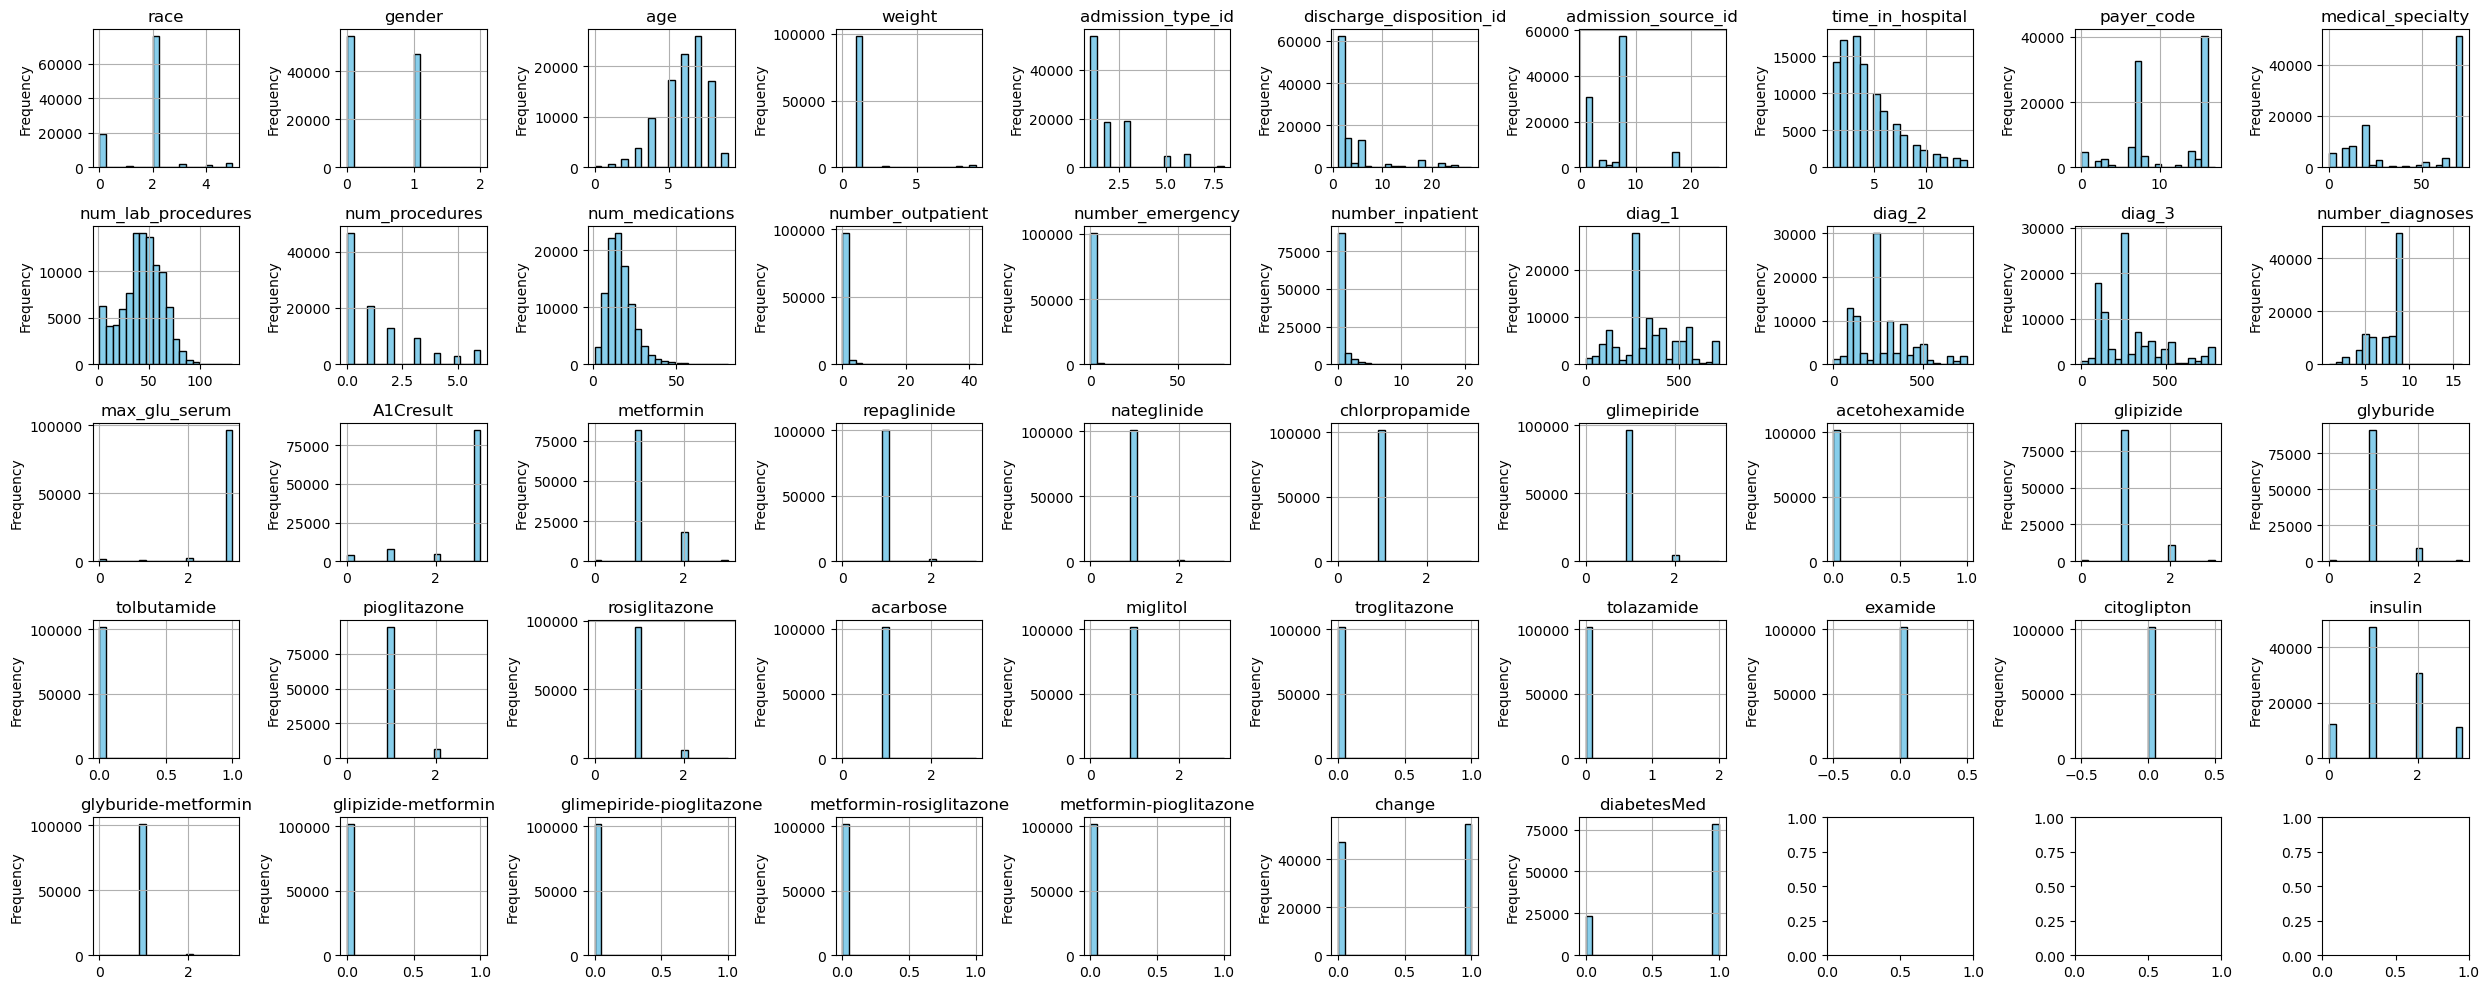

In [4]:
# Assuming X is a DataFrame and has columns as features
num_rows, num_cols = 5, 10
fig, axes = plt.subplots(num_rows, num_cols, figsize=(25, 10))

for i, column in enumerate(X.columns):
    ax = axes[i // num_cols, i % num_cols]
    X[column].plot(kind='hist', ax=ax, bins=20, edgecolor='black', color='skyblue')
    ax.set_title(column)
    ax.grid(True)

plt.tight_layout()
plt.show()

In [5]:
features_to_remove = ['weight', 'metformin-pioglitazone', 'metformin-rosiglitazone', 'glimepiride-pioglitazone', 'glipizide-metformin', 'glyburide-metformin', 'tolbutamide', 'acarbose', 'miglitol', 'troglitazone', 'tolazamide', 'examide',
'citoglipton', 'max_glu_serum', 'nateglinide', 'chlorpropamide', 'repaglinide', 'glimepiride', 'acetohexamide']

X = X.drop(columns=features_to_remove)

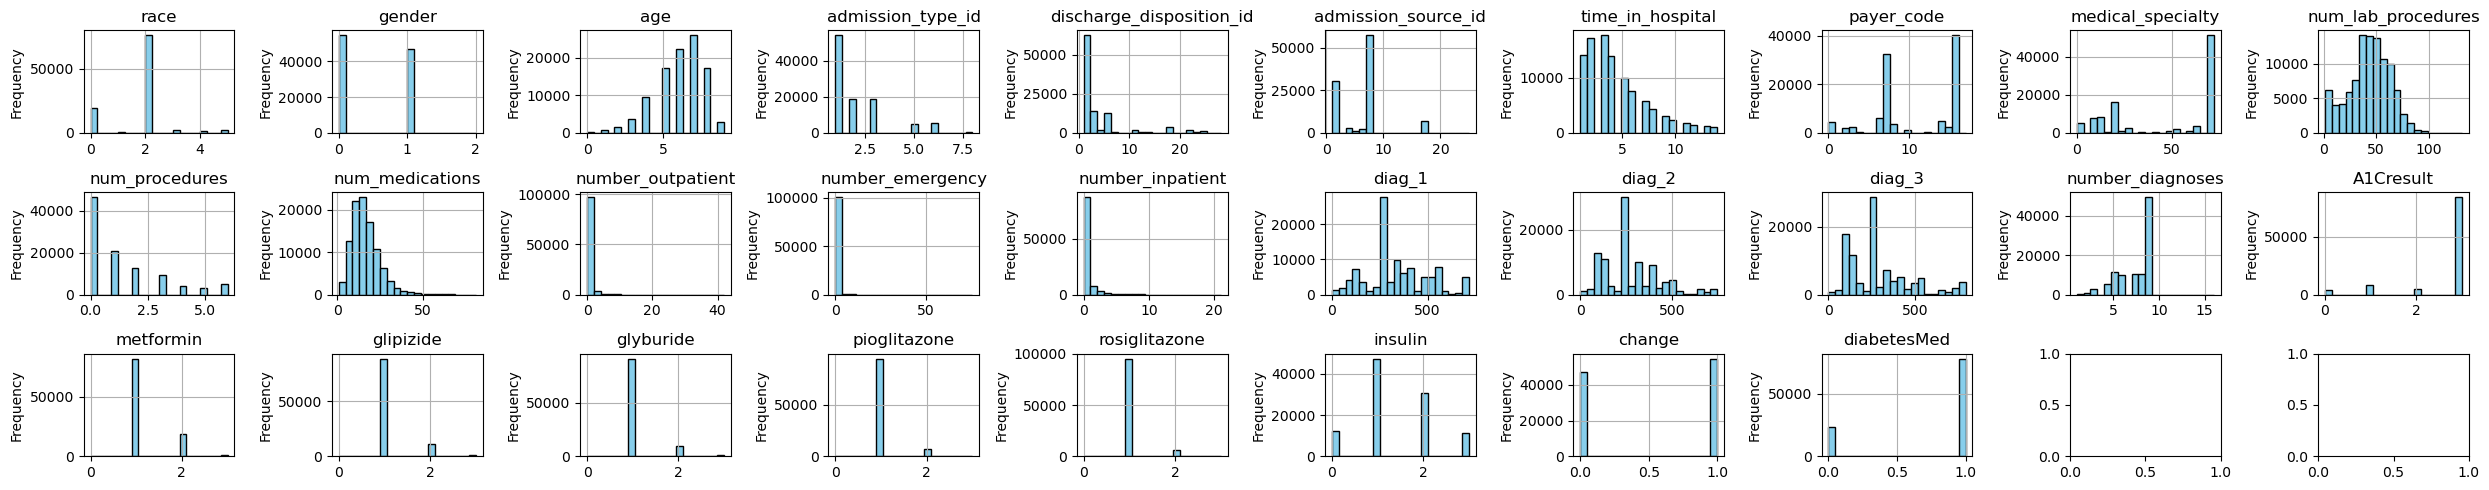

In [6]:
# Assuming X is a DataFrame and has columns as features
num_rows, num_cols = 3, 10
fig, axes = plt.subplots(num_rows, num_cols, figsize=(25, 5))

for i, column in enumerate(X.columns):
    ax = axes[i // num_cols, i % num_cols]
    X[column].plot(kind='hist', ax=ax, bins=20, edgecolor='black', color='skyblue')
    ax.set_title(column)
    ax.grid(True)

plt.tight_layout()
plt.show()

In [8]:
min_X = np.min(X, axis=0)
max_X = np.max(X, axis=0)
variance_X = np.var(X, axis=0)
mean_X = np.mean(X, axis=0)

for i in range(X.shape[1]):
    print(f"Feature {i+1} - Min: {min_X[i]}, Max: {max_X[i]}, Variance: {variance_X[i]}, Mean: {mean_X[i]}")

Feature 1 - Min: 0, Max: 5, Variance: 0.9701936780539279, Mean: 1.732788947192579
Feature 2 - Min: 0, Max: 2, Variance: 0.2486484494796395, Mean: 0.46244325216673543
Feature 3 - Min: 0, Max: 9, Variance: 2.5410780935801163, Mean: 6.096702238468644
Feature 4 - Min: 1, Max: 8, Variance: 2.0891688109184643, Mean: 2.024006053102215
Feature 5 - Min: 1, Max: 28, Variance: 27.879873842345724, Mean: 3.7156417664052825
Feature 6 - Min: 1, Max: 25, Variance: 16.516590726308934, Mean: 5.754436648782501
Feature 7 - Min: 1, Max: 14, Variance: 8.910780821080085, Mean: 4.395986871843248
Feature 8 - Min: 0, Max: 17, Variance: 26.666750245513086, Mean: 10.611667944107069
Feature 9 - Min: 0, Max: 72, Variance: 774.8384969228265, Mean: 46.054792366802275
Feature 10 - Min: 1, Max: 132, Variance: 387.07672627734803, Mean: 43.09564098028811
Feature 11 - Min: 0, Max: 6, Variance: 2.909748857192579, Mean: 1.339730361810428
Feature 12 - Min: 1, Max: 81, Variance: 66.05668337433822, Mean: 16.021844230882614
Fea

In [30]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score


Xtr, Xte, ytr, yte = train_test_split(X, y, test_size=0.2, random_state=seed)

max_depth = 6


dectree = DecisionTreeClassifier(max_depth=max_depth, criterion='entropy', random_state=seed)
dectree.fit(Xtr, ytr)

ytr_pred = dectree.predict(Xtr)
yte_pred = dectree.predict(Xte)

error_rate_train = 1 - accuracy_score(ytr, ytr_pred)
print(f"Training Error Rate: ", error_rate_train)

error_rate_validation = 1 - accuracy_score(yte, yte_pred)
print(f"Validation Error Rate: ", error_rate_validation)

Training Error Rate:  0.4211786960153294
Validation Error Rate:  0.41908224427630936


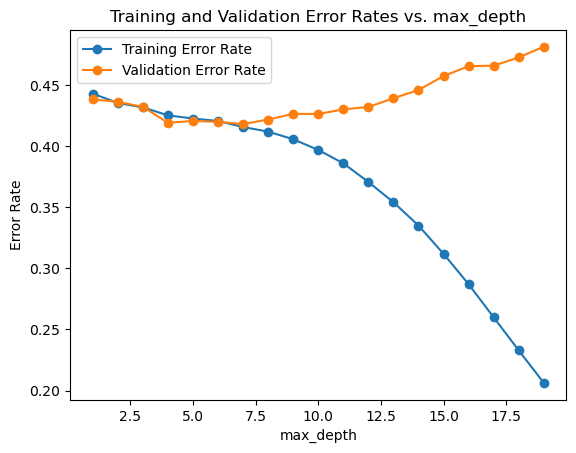

In [31]:
max_depths = range(1,20)
error_rates_tr = []
error_rates_te= []

for d in max_depths:
    dectree = DecisionTreeClassifier(max_depth=d, criterion='gini', random_state=seed)
    dectree.fit(Xtr, ytr)
    
    ytr_pred = dectree.predict(Xtr)
    yte_pred = dectree.predict(Xte)
    
    error_rate_train = 1 - accuracy_score(ytr, ytr_pred)
    error_rates_tr.append(error_rate_train)
    
    error_rate_validation = 1 - accuracy_score(yte, yte_pred)
    error_rates_te.append(error_rate_validation)

# Plot the results
plt.plot(max_depths, error_rates_tr, label='Training Error Rate', marker='o')
plt.plot(max_depths, error_rates_te, label='Validation Error Rate', marker='o')
plt.xlabel('max_depth')
plt.ylabel('Error Rate')
plt.title('Training and Validation Error Rates vs. max_depth')
plt.legend()
plt.show()

In [28]:
for i, j in enumerate(error_rates_te):
    print("max depth: ", i, " error rate: ", j)

print(min(error_rates_te))

# Best Max Depth  == 6

max depth:  0  error rate:  0.4379974452196128
max depth:  1  error rate:  0.4359830991451312
max depth:  2  error rate:  0.4318561462120468
max depth:  3  error rate:  0.41888572270806723
max depth:  4  error rate:  0.42031050407782256
max depth:  5  error rate:  0.4196718089810356
max depth:  6  error rate:  0.41775572369067504
max depth:  7  error rate:  0.42153876387933575
max depth:  8  error rate:  0.4261570207330254
max depth:  9  error rate:  0.4260587599489044
max depth:  10  error rate:  0.42979266974550456
max depth:  11  error rate:  0.43180701581998626
max depth:  12  error rate:  0.4388817922767023
max depth:  13  error rate:  0.44566178638105536
max depth:  14  error rate:  0.4570109069470374
max depth:  15  error rate:  0.4651665520290852
max depth:  16  error rate:  0.4655104647735089
max depth:  17  error rate:  0.47233958926992237
max depth:  18  error rate:  0.4809865382725754
0.41775572369067504


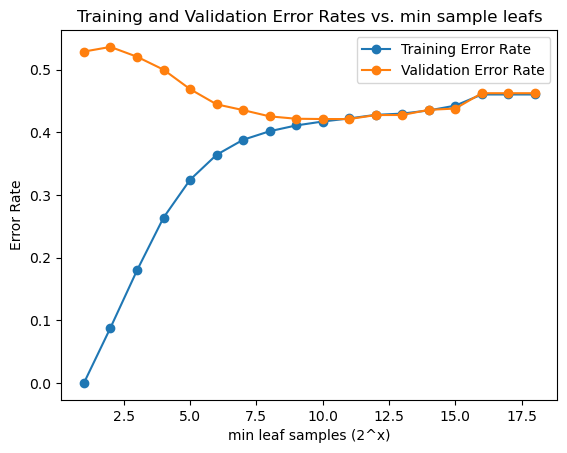

In [101]:
min_samples_leafs = [2**0, 2**1, 2**2, 2**3, 2**4, 2**5, 2**6, 2**7, 2**8, 2**9, 2**10, 2**11, 2**12, 2**13, 2**14, 2**15, 2**16, 2**17]
min_samples = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18]
error_rates_tr = []
error_rates_te= []

for m in min_samples_leafs:
    dectree = DecisionTreeClassifier(max_depth=100, min_samples_leaf = m ,criterion='gini', random_state=seed)
    dectree.fit(Xtr, ytr)
    
    ytr_pred = dectree.predict(Xtr)
    yte_pred = dectree.predict(Xte)
    
    error_rate_train = 1 - accuracy_score(ytr, ytr_pred)
    error_rates_tr.append(error_rate_train)
    
    error_rate_validation = 1 - accuracy_score(yte, yte_pred)
    error_rates_te.append(error_rate_validation)

# Plot the results
plt.plot(min_samples, error_rates_tr, label='Training Error Rate', marker='o')
plt.plot(min_samples, error_rates_te, label='Validation Error Rate', marker='o')
plt.xlabel('min leaf samples (2^x)')
plt.ylabel('Error Rate')
plt.title('Training and Validation Error Rates vs. min sample leafs')
plt.legend()
plt.show()


In [38]:
for i, j in enumerate(error_rates_te):
    print("min samples: 2^", i, " error rate: ", j)

print(min(error_rates_te))

# best Min Leaf Samples == 2^10

min samples: 2^ 0  error rate:  0.5289869313157118
min samples: 2^ 1  error rate:  0.5364056205168517
min samples: 2^ 2  error rate:  0.520733025449543
min samples: 2^ 3  error rate:  0.5000982607841211
min samples: 2^ 4  error rate:  0.4690478530018669
min samples: 2^ 5  error rate:  0.44477743932396585
min samples: 2^ 6  error rate:  0.4355409256165864
min samples: 2^ 7  error rate:  0.42556745602829915
min samples: 2^ 8  error rate:  0.4217352854475779
min samples: 2^ 9  error rate:  0.42129311191903307
min samples: 2^ 10  error rate:  0.4212439815269726
min samples: 2^ 11  error rate:  0.4276309324948413
min samples: 2^ 12  error rate:  0.4277291932789624
min samples: 2^ 13  error rate:  0.4359830991451312
min samples: 2^ 14  error rate:  0.4379974452196128
min samples: 2^ 15  error rate:  0.46251351085781667
min samples: 2^ 16  error rate:  0.46251351085781667
min samples: 2^ 17  error rate:  0.46251351085781667
0.4212439815269726


In [59]:
label_encoder = LabelEncoder()

for column in y.columns:
    if y[column].dtype == 'object':
        y[column] = label_encoder.fit_transform(y[column])
        print(y[column], ": ", list(label_encoder.classes_)) 

label_encoder = LabelEncoder()

for column in ytr.columns:
    if ytr[column].dtype == 'object':
        ytr[column] = label_encoder.fit_transform(ytr[column])
        print(ytr[column], ": ", list(label_encoder.classes_)) 

label_encoder = LabelEncoder()

for column in yte.columns:
    if yte[column].dtype == 'object':
        yte[column] = label_encoder.fit_transform(yte[column])
        print(yte[column], ": ", list(label_encoder.classes_)) 

print(ytr.info())


<class 'pandas.core.frame.DataFrame'>
Index: 81412 entries, 50908 to 92975
Data columns (total 1 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   readmitted  81412 non-null  int64
dtypes: int64(1)
memory usage: 1.2 MB
None


In [78]:
m,n = Xtr.shape
classifiers = []
numLearners = 100
msl = 2
md = 15

for b in range(numLearners):
    ind = (m * np.random.rand(m)).astype(int)
    Xb, Yb = Xtr.iloc[ind, :], ytr.iloc[ind]
    tree = DecisionTreeClassifier(max_depth=md, min_samples_leaf=msl, criterion='gini', random_state = seed)
    tree.fit(Xb, Yb)
    classifiers.append(tree)

In [80]:
from sklearn.ensemble import RandomForestClassifier

[[2.]
 [1.]
 [2.]
 ...
 [2.]
 [1.]
 [1.]]
predict1:  [2 1 2 ... 2 1 1]
0.46575611673381156
[[2. 2. 2. 2. 2.]
 [1. 1. 2. 2. 1.]
 [2. 2. 2. 2. 2.]
 ...
 [2. 2. 2. 2. 2.]
 [1. 2. 2. 2. 1.]
 [1. 1. 2. 1. 2.]]
predict1:  [2 1 2 ... 2 2 1]
0.4370148373784023
[[2. 2. 2. ... 2. 0. 1.]
 [1. 1. 2. ... 2. 2. 2.]
 [2. 2. 2. ... 2. 2. 2.]
 ...
 [2. 2. 2. ... 2. 2. 2.]
 [1. 2. 2. ... 1. 2. 2.]
 [1. 1. 2. ... 2. 1. 1.]]
predict1:  [2 2 2 ... 2 2 1]
0.4323474501326521
[[2. 2. 2. ... 2. 2. 2.]
 [1. 1. 2. ... 2. 2. 1.]
 [2. 2. 2. ... 2. 2. 2.]
 ...
 [2. 2. 2. ... 2. 2. 1.]
 [1. 2. 2. ... 1. 0. 2.]
 [1. 1. 2. ... 1. 1. 2.]]
predict1:  [2 2 2 ... 2 2 1]
0.4295470177852019
[[2. 2. 2. ... 2. 1. 2.]
 [1. 1. 2. ... 1. 1. 2.]
 [2. 2. 2. ... 1. 2. 2.]
 ...
 [2. 2. 2. ... 2. 1. 2.]
 [1. 2. 2. ... 2. 1. 2.]
 [1. 1. 2. ... 2. 1. 1.]]
predict1:  [2 2 2 ... 2 2 1]
0.42478136975533065
[[2. 2. 2. ... 1. 2. 2.]
 [1. 1. 2. ... 2. 2. 1.]
 [2. 2. 2. ... 2. 2. 2.]
 ...
 [2. 2. 2. ... 2. 2. 1.]
 [1. 2. 2. ... 2. 2. 2.]
 [1.

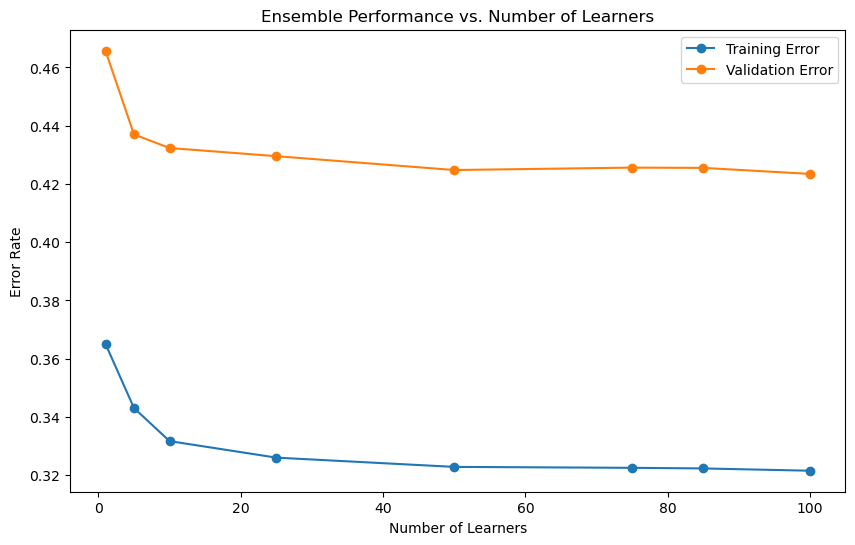

In [82]:
ensemble_num = [1, 5, 10, 25, 50, 75, 85, 100]

train_errors = []
val_errors = []

def calculate_mode(arr):
    unique_values, counts = np.unique(arr, return_counts=True)
    mode_index = np.argmax(counts)
    mode = unique_values[mode_index]
    return mode

# Iterate over the specified number of learners
for num_learners in ensemble_num:
    # Use the first num_learners models from the ensemble
    ensemble_subset = classifiers[:num_learners]

    
    
    mTest = Xtr.shape[0]
    predict = np.zeros((mTest, num_learners))
    
    for i in range(num_learners):
        predict[:,i] = ensemble_subset[i].predict(Xtr)
    print(predict)
    predict1 = np.mean(predict, axis=1)
    predict1 = np.round(predict1).astype(int)
    print("predict1: ", predict1)
    #predict1 = [-1 if num < 0 else 1 for num in predict1]
    
    tr_error = 1 - accuracy_score(ytr, predict1)

    train_errors.append(tr_error)


    
    mTest = Xte.shape[0]
    predict = np.zeros((mTest, num_learners))

    for i in range(num_learners):
        predict[:,i] = ensemble_subset[i].predict(Xte)

    predict2 = np.mean(predict, axis=1)
    predict2 = np.round(predict2).astype(int)
    #predict2 = [-1 if num < 0 else 1 for num in predict2]

    te_error = 1 - accuracy_score(yte, predict2)
    print(te_error)

    val_errors.append(te_error)

# Plot the training and validation errors
plt.figure(figsize=(10, 6))
plt.plot(ensemble_num, train_errors, label='Training Error', marker = 'o')
plt.plot(ensemble_num, val_errors, label='Validation Error',  marker = 'o')
plt.xlabel('Number of Learners')
plt.ylabel('Error Rate')
plt.title('Ensemble Performance vs. Number of Learners')
plt.legend()
plt.show()

In [89]:
rf = RandomForestClassifier()
rf.fit(Xtr, ytr)

y_pred = rf.predict(Xte)
accuracy = accuracy_score(yte, y_pred)
print("Accuracy:", accuracy)


Accuracy: 0.5838655792473224


In [93]:

from sklearn.model_selection import RandomizedSearchCV

In [95]:
param_dist = {'n_estimators': np.random.randint(50,500, size=5),
              'max_depth': np.random.randint(1,20,size = 5)}

# Create a random forest classifier
rf = RandomForestClassifier()

# Use random search to find the best hyperparameters
rand_search = RandomizedSearchCV(rf, 
                                 param_distributions = param_dist, 
                                 n_iter=5, 
                                 cv=5)

# Fit the random search object to the data
rand_search.fit(Xtr, ytr)

RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_iter=5,
                   param_distributions={'max_depth': array([ 9,  8,  3,  6, 17]),
                                        'n_estimators': array([365, 290, 123, 316, 282])})

In [97]:

# Print the best hyperparameters
print('Best hyperparameters:',  rand_search.best_params_)

Best hyperparameters: {'n_estimators': 365, 'max_depth': 17}


In [100]:
rf = RandomForestClassifier(n_estimators = 365, max_depth = 100)
rf.fit(Xtr, ytr)

y_pred = rf.predict(Xte)
accuracy = accuracy_score(yte, y_pred)
print("Accuracy:", accuracy)


Accuracy: 0.5871573155153779
